$$
\text{Gamma}(x; \alpha, \beta, x > 0) = x^{\alpha - 1} \exp( - x \beta) / Z \\
Z = \Gamma(\alpha) \beta^\alpha
$$


$$
\int \frac{\exp(-r^2)}{ \exp(-r^2 \beta) * r^{2 (\alpha - 1)} } { \Gamma(\alpha)  ({\beta \over \pi})^\alpha P(r^2)}
. \text{d} V = 1\\
\beta = 1
$$

$$
\int r^{ -2 (\alpha - 1)}  { \Gamma(\alpha) \pi^{-\alpha} P(r^2)}
. \text{d} V = 1\\
$$

$$
\int r^2 (\pi r^2)^{ -\alpha }  { \Gamma(\alpha) P(r^2)}
. \text{d} V = 1\\
$$

$$
r^2 (\pi r^2)^{ -D/2 } \cdot { \Gamma( D/2
) \cdot P(r^2)}
. \text{d} (\vec{x}) = \text{d} (r^2)
\\
r^2 = \vec{x}^T \vec{x}
\\
\vec{x} \in \mathbb{R}^D
$$

$$
\int \exp\left[  (-a+1)\log(r^2) - a \log \pi + \log \Gamma(a) + \log P(r^2)\right].\text{d} V = 1
$$

In [52]:
import scipy.integrate as spint
import numpy as np
import scipy.special as spsp
def f(y,x):
    res = np.exp( - np.square([x,y]).sum()) / np.pi
    return res

def make_gammaNormal(alpha=4.,beta=1.):
    Z = spsp.gamma(alpha) * beta**alpha
    def f(y,x):
        rsq =  np.square([x,y]).sum()
        res = np.exp(-rsq*beta) * rsq ** (alpha-1.)/Z 
    #     res = np.exp( -rsq) 
        res = res/np.pi
        return res
    return f


def normConst(f,R=10):
#     R = 10
    res  = spint.dblquad(func=f,a=-R,b=R,
                  gfun=lambda x:-R,hfun=lambda x:R)
    return res
# spint.quad(func=f,a=(1,1),b=(2,2))

()
()
()
()


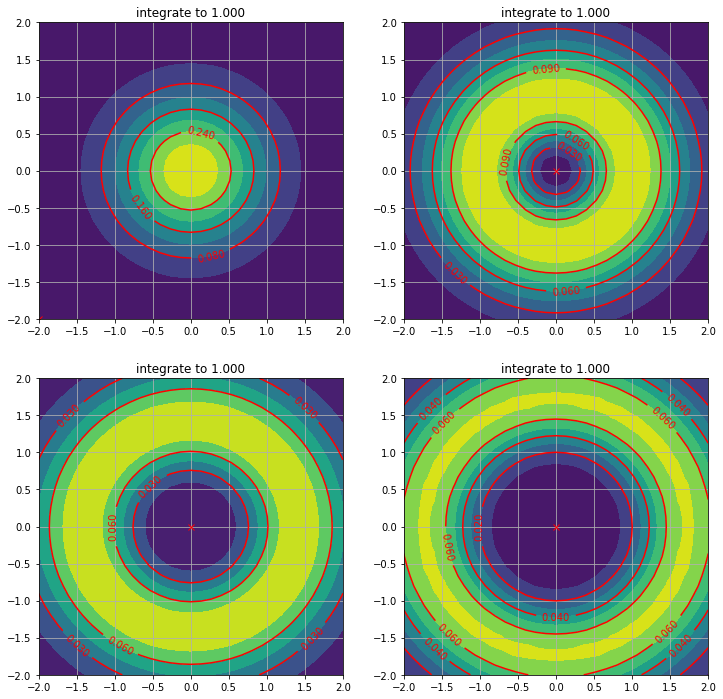

In [36]:
import pymisca.vis_util as pyvis
%matplotlib inline
plt = pyvis.plt 
fig,axs = plt.subplots(2,2,figsize=[12,12]); axs = np.ravel(axs)
i = -1

for alpha in range(1,5):
    i+=1; ax= axs[i]
    f= make_gammaNormal(float(alpha),1.)
    pyvis.dmet_2d(f,ax=ax);
#     pyvis.plt.show()
    Z = normConst(f)[0]
    ax.set_title('integrate to %.3f'%Z)
    print ()

The slowest run took 12.08 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.7 µs per loop
10000 loops, best of 3: 126 µs per loop


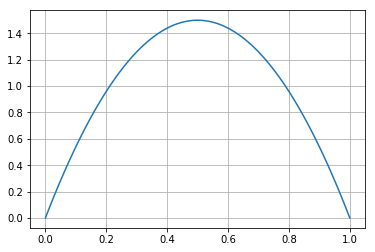

In [61]:

# rv.pdf(xs)
# pyutil.fun
pyvis.preview(
    lambda x: rv.dist._pdf(x,2,2)
)

f =pdf = lambda x: rv.dist._pdf(x,2,2)
g = rv.pdf

%timeit f(1)
%timeit g(1)

In [49]:
 normConst(f)

(0.0, 0)

In [67]:
%timeit np.nan_to_num(np.nan)

The slowest run took 8.46 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15 µs per loop


In [71]:
%timeit (0. if np.isnan(np.random.random()) else 1.)

The slowest run took 49.22 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.11 µs per loop


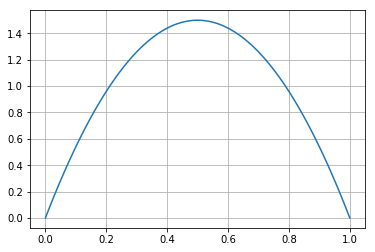

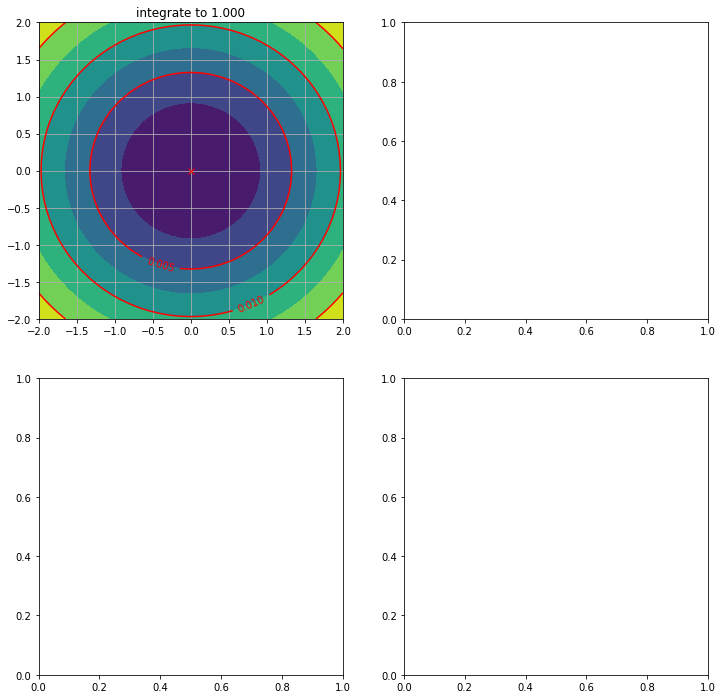

In [136]:
import scipy.stats as spstat
rv = spstat.beta(1.,1.)
pdf = beta_pdf = lambda x: rv.dist._pdf(x,2,2)
pyvis.preview(pdf)
R = 5.
if 1:
    def f(y,x):
        rsq =  np.square([x,y]).sum()
        res = pdf(rsq/R**2)/R**2
#         res = (rsq < 4.)/4.
#         res  = np.nan_to_num(pdf(rsq/R**2))
        res = (0. if np.isnan(res) else res)
#         res = np.exp(-rsq*beta) * rsq ** (alpha-1.)/Z 
    #     res = np.exp( -rsq) 
        res = res/np.pi
        return res
    
fig,axs = plt.subplots(2,2,figsize=[12,12]); axs = np.ravel(axs)
i = -1
if 1:
    i+=1;ax = axs[i]
    pyvis.dmet_2d(f,ax=ax);
#     pyvis.plt.show()
    Z = normConst(f,R=R)[0]
    ax.set_title('integrate to %.3f'%Z)

In [ ]:
N = int(1E7)
R= 8
D = 4

def f(x):
    rsq = np.square(x)
    rsq  = np.sum(rsq,axis=1)
    
#     gamma = 
    res = np.exp(-rsq) 
    
#     res = pdf(rsq/R**2)/R**2
#     res[np.isnan(res)] = 0.

#     res = (0. if np.isnan(res) else res)    
    
#     res = 
    res = res /(np.pi)**(D/2.)
    return res

In [ ]:
%%writefile  /home/shouldsee/repos/pymisca/pymisca/mc_integral.py

# from __future__ import absolute_import

import util as pyutil
# import pymisca.util as pyutil
np = pyutil.np
import scipy.special as spspec

def unif(D,R,N=1000):
    X = (np.random.random(size=(N,D))-0.5)*R
    return X

def cubicRInt(f,D,N=1000,R=5.):
    '''
    Integral on a hypercube
'''
    X = unif(N=N,D=D,R=R)
    val = np.mean(f(X),axis=0) * R**D
    return val

def suf(alpha):
    '''
    Surface area of a (D-1) sphere, with D = 2 * \alpha
'''
    val  = 2 * np.pi ** alpha / spspec.gamma(alpha)
    return val


def surfInt(f,N=10000,D=2):
    '''
    Integration on (the surface of) a (D-1) sphere
'''
    phis = pyutil.random_unitary((N,D))
#     phis = np.random.uniform(0,2 * np.pi,size=Ns)
    ys = f(phis)
    avg = np.mean(ys) * suf(D/2.)
    return avg

Overwriting /home/shouldsee/repos/pymisca/pymisca/mc_integral.py


In [304]:
cubicRInt(f,D=D,R=R,N=N,)

is in ipython: 1


1.0003568377093999

In [ ]:
import scipy.special as spspec


In [184]:

def make_gammaNormal(alpha=4.,beta=1.):
    Z = spsp.gamma(alpha) * (beta/np.pi)**alpha
    def f(x):
        rsq = np.square(x)
        rsq  = np.sum(rsq,axis=1)        
        
#         gamma = np.exp(-rsq*beta) * rsq ** (alpha-1.)/Z 

#         partition = np.exp( -rsq) /gamma
        partition = spsp.gamma(alpha) * rsq * (rsq*np.pi) ** -alpha
#         partition = Z * rsq ** (1-alpha )
#         pdf = gamma
#         pdf = beta_pdf(rsq)
        pdf = np.exp(-rsq)
        pdf[np.isnan(pdf)] = 0.
        
        res = partition * pdf
#         res = gamma
#         res = res /(np.pi)**(alpha)
        return res
    return f

D = 2
f = make_gammaNormal(alpha=D/2.,)

cubicRInt(f,D=D,R=R,N=N,)

2.0000141196734202

In [175]:

unifPdf = lambda r: (r<3.0)/3.0
unifPdf = lambda r: (0.25 * (r<2.0) + 0.5 * (r>2.5) * (r<3.5)) 
def make_gammaNormal(alpha=4.,beta=1.):
    Z = spsp.gamma(alpha) * (beta/np.pi)**alpha
    Galpha = spsp.gamma(alpha)
    
    def f(x):
        rsq = np.square(x)
        rsq  = np.sum(rsq,axis=1)    
        partition = rsq * (rsq * np.pi) ** ( - alpha ) * Galpha
        
#         pdf = beta_pdf(rsq)
#         pdf[np.isnan(pdf)] = 0.
#         pdf = unifPdf(rsq)
        pdf = np.exp(-rsq)
    
#         pdf  = 
        
        res = partition * pdf
#         res = gamma
#         res = res /(np.pi)**(alpha)
        return res
    return f

D = 4
N = int(5E6)
f = make_gammaNormal(alpha=D/2.,)

cubicRInt(f,D=D,R=R,N=N,)

1.0033955725775672

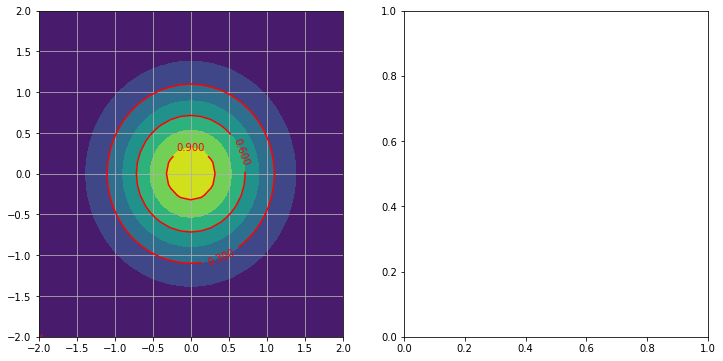

In [173]:
# pdf = unifPdf
pdf = lambda x:np.exp(-x)
pyvis.dmet_2d(lambda *x: pdf(x[0]**2 + x[1]**2));

0.565159103992485

In [24]:
spspec.iv(1,kappa),spspec.i1(kappa)

(0.565159103992485, 0.5651591039924851)

Verify that

$$
\int_{S^{D-1}} \exp(\kappa \cos(x_0) ) .\text{d}\vec{x}  = 
\frac{ I_{D/2 - 1}(\kappa) \cdot (2\pi)^{D/2 }}{ \kappa ^ {D/2 - 1}}
$$

In [311]:


random_unitary((10000,2))[:,0]

kappa = 2.
f = lambda phi: np.exp(phi[:,0]*kappa)
vol = lambda alpha: np.pi ** alpha / spspec.gamma(alpha+1.)
suf = lambda alpha: 2 * np.pi ** alpha / spspec.gamma(alpha)
def partition(D,kappa=1.):
    alpha = D/2.
    B = spspec.iv(alpha -1. ,kappa) * (2 * np.pi) ** alpha / kappa **(alpha-1)
    return B
for D in range(1,5):
    alpha = D/2.
    print 'Dimension: %d' %D

    
    print vol(alpha),suf(alpha)
    A = surfInt(f,1800000,D=D) 
    # 2 * np.pi 
    B = partition(D,kappa=kappa)
#     B = spspec.iv(alpha -1. ,kappa) * (2 * np.pi) ** alpha

    print (A/B),A,B
# spspec.i1

Dimension: 1
2.0 2.0
0.9995608318801886 7.52108690935123 7.524391382167262
Dimension: 2
3.141592653589793 6.283185307179586
1.000362698303073 14.328251826525015 14.323056878100513
Dimension: 3
4.188790204786391 12.566370614359174
1.0007719317475399 22.805826988634475 22.78823602577575
Dimension: 4
4.934802200544679 19.739208802178716
0.9987738306409485 31.35941384326566 31.397913002127034


In [307]:
partition(D) / (2*np.pi) / np.exp(1./4)

2.765521096602965

In [315]:
??suf

In [374]:
suf(2/2.)

6.283185307179586



$$\begin{align}
\int \frac{ P(r) } { \text{suf}_D(r) } \text{d} \vec{x} = \int P(r)\text{d} r
\\
\text{suf}_D(r) = \text{suf}_D(1) \cdot r ^ {D-1}
\\
\int  P(r)  \frac{1} { \text{suf}_D(1) } \frac{1} { r^{D-1} } \text{d} \vec{x} = \int P(r)\text{d} r
\end{align}$$

But for a high-dimensional angle $\theta$ defined by its corresponding area on a unit hypersphere $S^{D-1}(r=1)$, one has
$$\begin{align}
\int_{S^{D-1} }1.\text{d} \theta &= \text{suf}_D(1)
\\
\int_{S^{D-1} }P(\theta)\text{d} \theta &= 1,\, P(\theta) = \frac{1}{\text{suf}_D(1)}
\end{align}$$

is the ordinary uniform distribution on $\theta$. Hence the original RHS becomes

$$\begin{align}
\int  P(r)  \frac{1} { \text{suf}_D(1) } \frac{1} { r^{D-1} } \text{d} \vec{x} &= \int P(r)\text{d} r
\\
\int  P(r)  P(\theta) \frac{1} { r^{D-1} } \text{d} \vec{x} &= \int P(r)\text{d} r
\\
\int  P(r)  P(\theta) \frac{1} { r^{D-1} } \text{d} \vec{x} &= \int P(r)\int P(\theta) .\text{d} \theta .\text{d} r
\end{align}$$

effectively, this change of variable projects a $D$-dimensional vector $\vec{x}$ to a two dimensional coordinate $(r,\theta)$, where $\theta$ is a unitary vector on $S^{D-1}$. 

1. Inference will be straight forward given this PDF. 

1. Sampling of non-uniform $\theta$ is more problematic since hypersphere is not natural to sample.
    
    Inspired by this [math-stackexchange](https://math.stackexchange.com/questions/859576/non-uniform-sampling-of-n-sphere), a factorisable $P(\theta)=f(\theta^T \mu )$ distribution can be sampled by first sampling the polar angle $\cos(\phi) = \frac{\theta^T \mu}{|\theta||\mu|} = \theta^T \mu $ to obtain a single coordinate $\theta^T \mu$ in the direction of $\mu$, then sample the rest of the coordinates as from a uniform distribution on a $S^{D-2}$ hypersphere. The problem is that one needs to find the rotation matrix that project $(1,0,0,\cdots,0)$ to $\mu$.

[0.99744651]


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


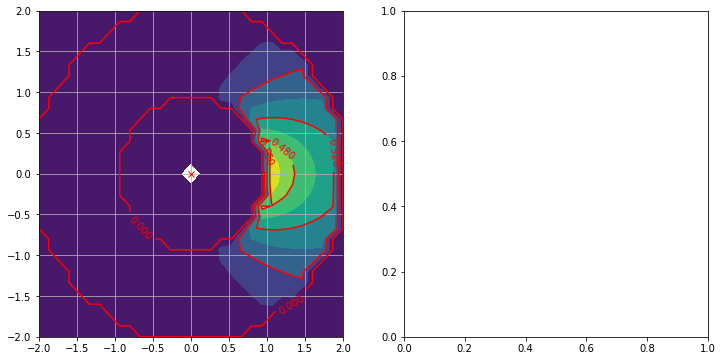

In [410]:
import pymisca.vis_util as pyvis
%matplotlib inline
D = 2
alpha = D/2.
esuf = suf(D/2.)
kappa = 3.
part = partition(D,kappa = kappa)
ga = spspec.gamma(D/2.)

def f(*x):
    if isinstance(x[0],np.ndarray):
        phi = np.transpose(x)
        r = np.linalg.norm(phi,axis=0)
        rsq = np.square(r)
    else:
        phi = x
        rsq = np.sum(np.square(phi))
        r=  rsq ** 0.5
        
    cos = phi[0]/r
    res = 1.
    
    #### P(\theta)
    res *= np.exp(cos*kappa) /part 
#     res *= (0.5/np.pi) 
#     res *= 1. /esuf

    ##### P(r)
    res *= (r > 1) * (r < 2) / 1.
#     res *= np.exp(-rsq) * rsq ** (alpha -1 ) / ga * 2. * r
    
    #### Jacobian
    res *= 1./ ( r ** (D-1)) 
    
    return res
# f = lambda *phi: np.exp(phi[0]*kappa - (phi[0]**2 + phi[1]**2)) / (phi[0]**2 + phi[1]**2) ** 0.5 * esuf 
# f = lambda phi: np.exp(phi.T[0]*kappa - (phi.T[0]**2 + phi.T[1]**2)) / (phi.T[0]**2 + phi.T[1]**2) ** 0.5 * esuf 
R = 14
N = 6000000
val = cubicRInt(f,D=D,R=R,N=N,) 
print (val)
if D==2:
    pyvis.dmet_2d(f);
# / (4 * np.pi)
# (2*np.pi)
# partition(D)

In [104]:
# ! grep -rnw . -e "random_normal"

./.ipynb_checkpoints/demo__ddgmm-checkpoint.ipynb:387:    "        sampled = random_ops.random_normal(\n",
./demo__ddgmm.ipynb:387:    "        sampled = random_ops.random_normal(\n",


In [112]:
import pymisca.util as pyutil;reload(pyutil)
def random_unitary(size=(1,3)):
    X = np.random.normal(0.,1.,size=size)
    X = X/ np.linalg.norm(X,axis=1,keepdims=1)
    return X
pyutil.random_unitary = random_unitary
# pyutil.random_angle(100)
# def random_unitary()
# import pymisca.proba as pyprob
# pyprob.

is in ipython: 1


In [ ]:
tf.contrib.distributions.Normal